# Mongolian Food Classifier

## Package Installation and Imports

In [1]:
!pip install -Uqq fastai --upgrade
!pip install -Uqq fastcore --upgrade
!pip install -Uqq duckduckgo_search --upgrade

In [2]:
import fastai
import fastcore
print('Fast.ai version:', fastai.__version__)
print('Fastcore version:', fastcore.__version__)


Fast.ai version: 2.7.14
Fastcore version: 1.5.29


In [3]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastdownload import download_url

In [4]:
from duckduckgo_search import DDGS
from fastcore.all import *

In [5]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        search_results = ddgs.images(keywords=term)
        image_urls = [next(search_results).get("image") for _ in range(max_images)]
        return L(image_urls)

In [6]:
urls = search_images("mongolian food images", max_images=10)
print(urls[5])

Searching for 'mongolian food images'
https://meanwhileinmongolia.com/wp-content/uploads/2020/06/Mongolian-Food.jpg


### Gather Data

In [7]:
path = Path('food')

In [8]:
food_types = 'buuz', 'huushuur', 'tsuivan', 'niislel salad'

In [9]:
if not path.exists():
    path.mkdir()
    for o in food_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        urls = search_images(f'{o} food', max_images=30)
        download_images(dest, urls=urls)

In [10]:
fns = get_image_files(path) 

In [11]:
failed = verify_images(fns)
failed.map(Path.unlink)

(#0) []

### Build Data Loader

In [12]:
foods = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42), 
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = foods.dataloaders(path)

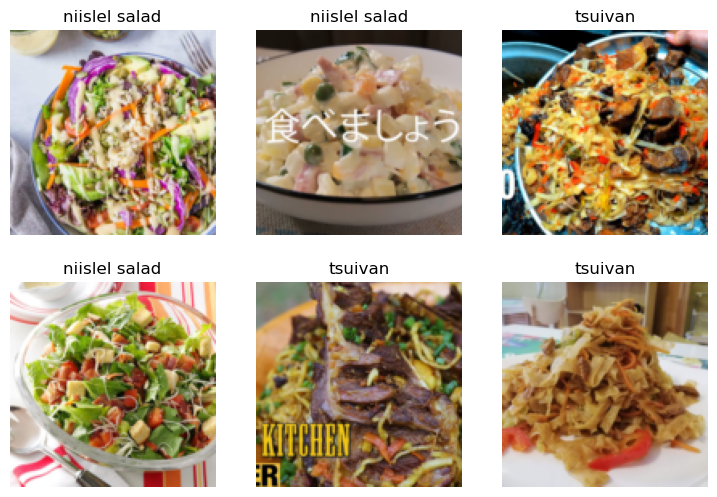

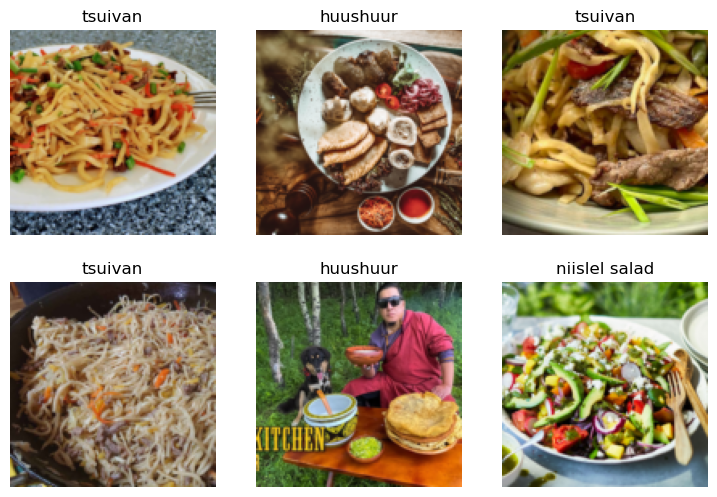

In [14]:
dls.valid.show_batch(max_n=6, nrows=2)
dls.train.show_batch(max_n=6, nrows=2)

### Perform Transfer Learning

In [15]:
learn = cnn_learner(dls, resnet18)
learn.fine_tune(4)

C:\Users\mnkhz\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,time
0,2.326246,2.804016,00:12


epoch,train_loss,valid_loss,time
0,2.297134,2.602446,00:12
1,2.315888,2.407381,00:12
2,2.009436,2.090513,00:12
3,1.721594,1.810926,00:12


### Evaluate Learner

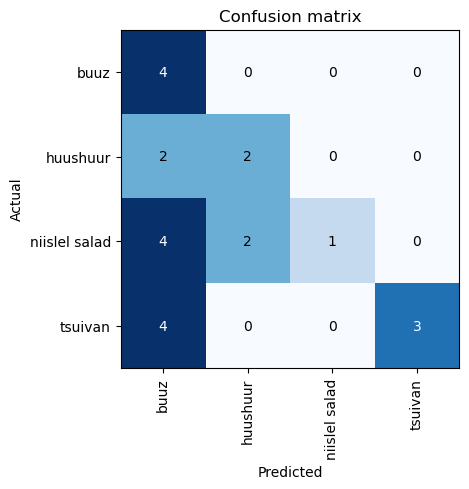

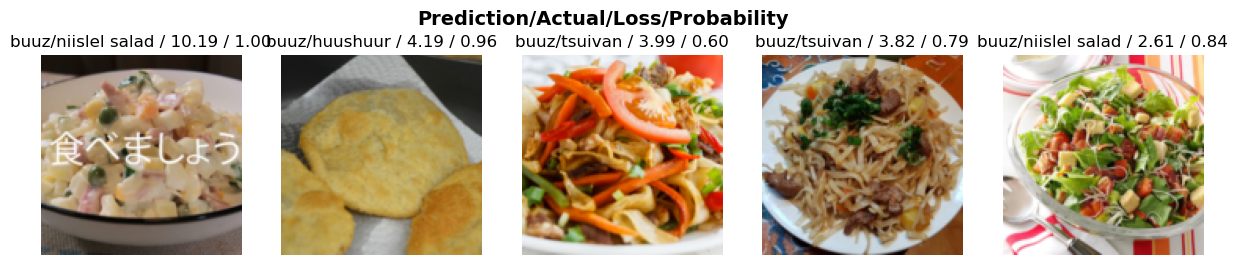

C:\Users\mnkhz\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\curl_cffi\aio.py:192: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)